# Natural Language processing 

In [7]:
# Natural language processing (NLP) work by converting words (text) into numbers.
# These numbers are then used to train an AL/ML model to make predictions.
# Predictions could be sentiment inferred from social media posts and product reviews.
# AL/ML based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not.
# The process could be done automatically without having humans manually review thousands of tweets and customer reviews.
# In this case study, we will analyze thousands of twitter tweets to predict people's sentiment.

In [8]:
# Loading the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# loading the data
tweets_df=pd.read_csv("twitter.csv")
tweets_df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [12]:
tweets_df=tweets_df.drop(['id'],axis=1)

In [13]:
tweets_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


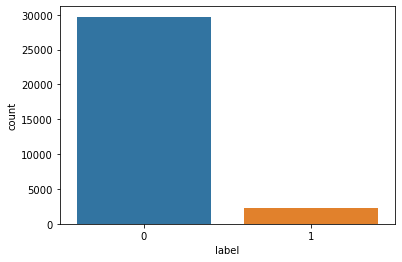

In [14]:
# Explore Data Analysis (EDA)
sns.countplot(tweets_df['label'])
plt.show()

In [15]:
# let us get the length of the message.
tweets_df['length']=tweets_df['tweet'].apply(len)

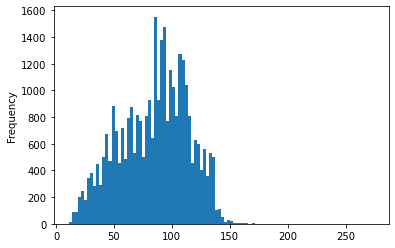

In [16]:
tweets_df['length'].plot(bins=100,kind='hist')
plt.show()

In [17]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [18]:
# let's see the shortest message
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

'i love you '

In [19]:
# Now let's see the longest message also
tweets_df[tweets_df['length']==274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [20]:
positive=tweets_df[tweets_df['label']==0]
negative=tweets_df[tweets_df['label']==1]

In [21]:
# Plot the WordCloud

In [22]:
sentences=tweets_df['tweet'].to_list()

In [23]:
len(sentences)

31962

In [24]:
sentences_as_one_string=" ".join(sentences)

In [25]:
!pip install WordCloud

In [26]:
from wordcloud import WordCloud

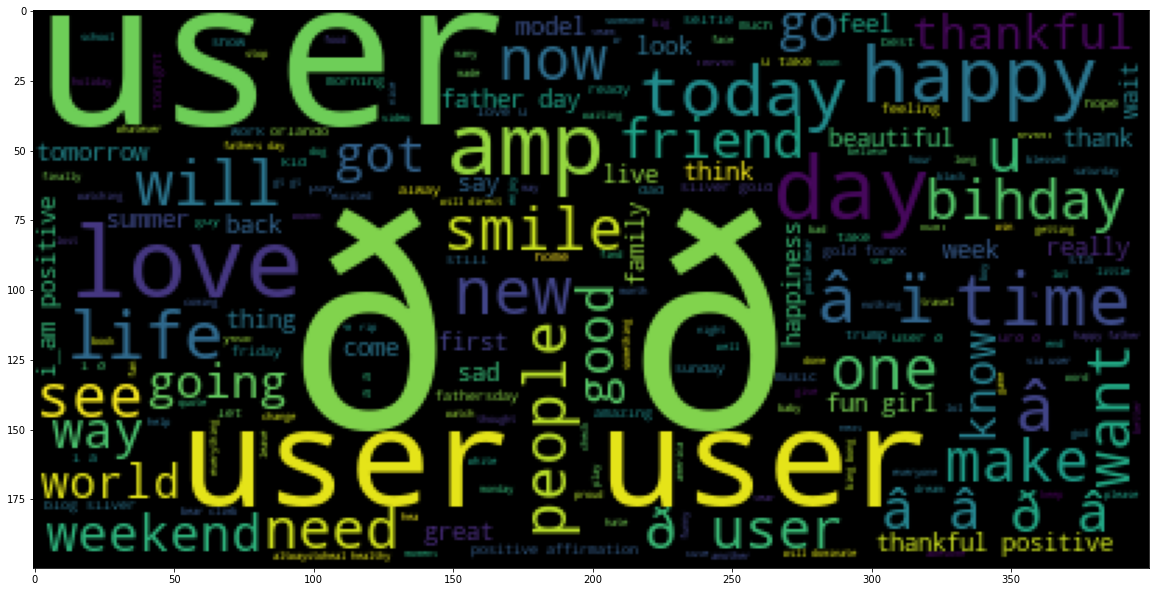

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))
plt.show()

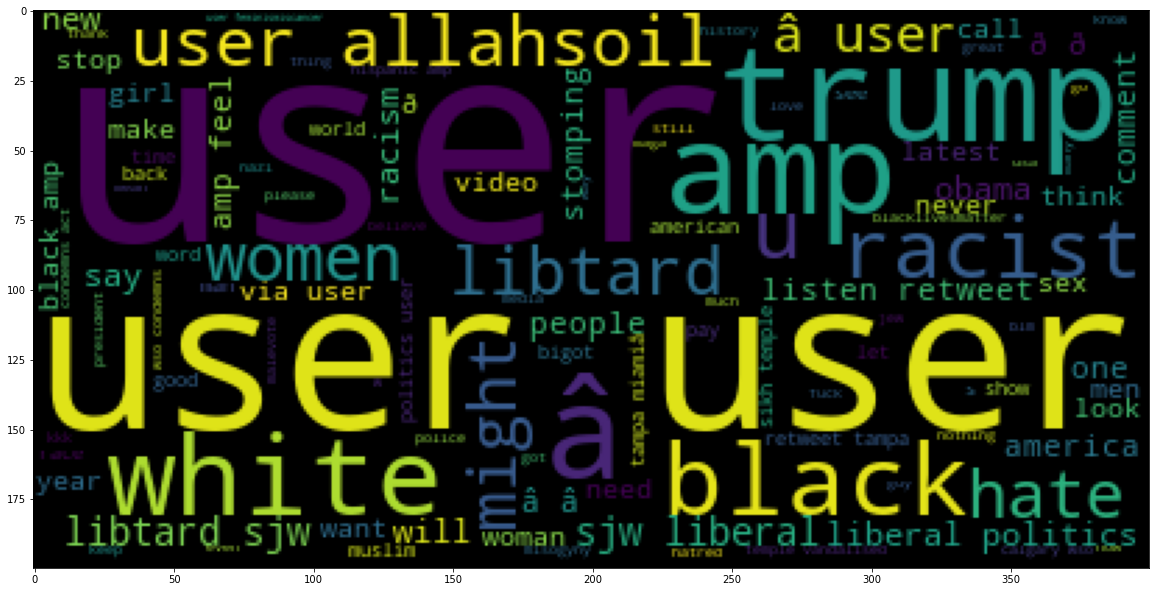

In [28]:
negative_list=negative['tweet'].to_list()
negative_sentences_as_one_string=" ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))
plt.show()

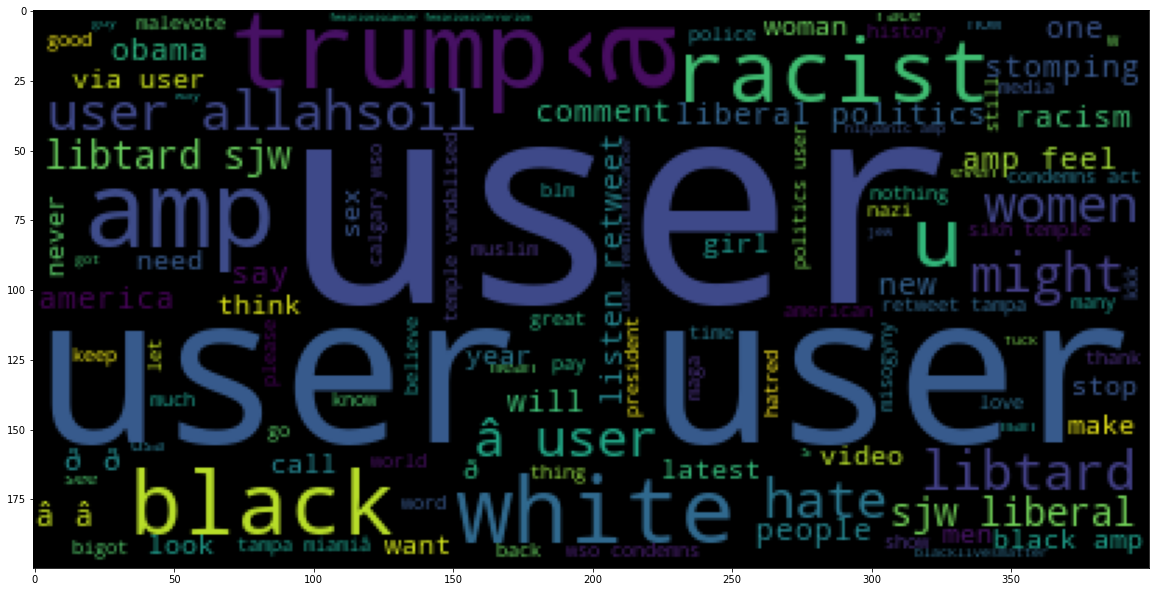

In [29]:
positive_list=negative['tweet'].to_list()
positive_sentences_as_one_string=" ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))
plt.show()

In [30]:
# Perform Data Cleaning -Remove Punctuation from text

In [31]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
Test="Good Morning beautiful people :)... I am having fun learning Natural language processing and Computer Vision!!"

In [33]:
Test_punc_removed=[char for char in Test if char not in string.punctuation]

In [34]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'M',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'N',
 'a',
 't',
 'u',
 'r',
 'a',
 'l',
 ' ',
 'l',
 'a',
 'n',
 'g',
 'u',
 'a',
 'g',
 'e',
 ' ',
 'p',
 'r',
 'o',
 'c',
 'e',
 's',
 's',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'C',
 'o',
 'm',
 'p',
 'u',
 't',
 'e',
 'r',
 ' ',
 'V',
 'i',
 's',
 'i',
 'o',
 'n']

In [35]:
# Join the characters again to form the string
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join

'Good Morning beautiful people  I am having fun learning Natural language processing and Computer Vision'

In [36]:
# Performing Data Cleaning (Remove stopwords)

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# you have to download stopwords package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [40]:
Test_punc_removed_join_clean # only important (no so common) words are left

['Good',
 'Morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Natural',
 'language',
 'processing',
 'Computer',
 'Vision']

In [41]:
# Perform Count Vectorization (Tokenization)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

In [43]:
vectorizer =CountVectorizer()
X=vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [44]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [45]:
# Create a pipeline to remove punctuations,stopwords and perform count vectorization

In [46]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed=[char for char in message if char not in string.punctuation]
    Test_punc_removed_join=''.join(Test_punc_removed)
    Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [47]:
# Let's test the newly added function
tweets_df_clean=tweets_df['tweet'].apply(message_cleaning)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
# define the cleaning pipeline we defined earlier
vectorizer=CountVectorizer(analyzer=message_cleaning,dtype='uint8')
tweets_countvectorizer=vectorizer.fit_transform(tweets_df['tweet'])

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [50]:
print(vectorizer.get_feature_names())

['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [51]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
tweets_countvectorizer.shape

(31962, 47386)

In [53]:
tweets=pd.DataFrame(tweets_countvectorizer.toarray())

In [54]:
X=tweets

In [55]:
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y=tweets_df['label']

# Naive Bayes Classifier Model

In [58]:
X.shape

(31962, 47386)

In [59]:
y.shape

(31962,)

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [63]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [64]:
# Assess Trained model performance

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

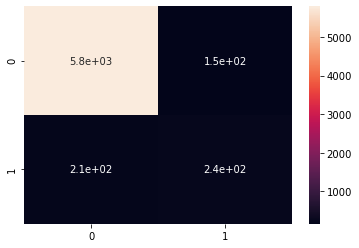

In [66]:
# Predicting the Test set results
y_predict_test=NB_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [67]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5952
           1       0.61      0.53      0.57       441

    accuracy                           0.94      6393
   macro avg       0.79      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393



# Logistic Regression

C:\Users\Suman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


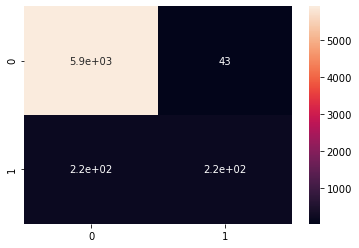

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict_test=lr.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [70]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5952
           1       0.84      0.51      0.63       441

    accuracy                           0.96      6393
   macro avg       0.90      0.75      0.81      6393
weighted avg       0.96      0.96      0.95      6393

